In [1]:
import math
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

## 1) Formulate question

## 2) Gather data

### Background info:

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

#### Variables (in order):
- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 
otherwise)
- **NOX**: Nitric oxides concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centres
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property-tax rate per $10,000
- **PTRATIO**: Pupil-teacher ratio by town
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000's (target variable)

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston" # Source of the data
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT', 'MEDV'] # Names of the features and label
df = pd.DataFrame(data, columns=columns)
df.shape # Number of data points (rows) and features (columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 3) Clean/preprocess data

In [3]:
# 1) Remove null rows

df.isnull().sum() # Number of missing values
df.dropna(inplace=True)

# 2) Remove duplicates

df.drop_duplicates(inplace=True)

df.shape

(506, 14)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 4) Visualize data

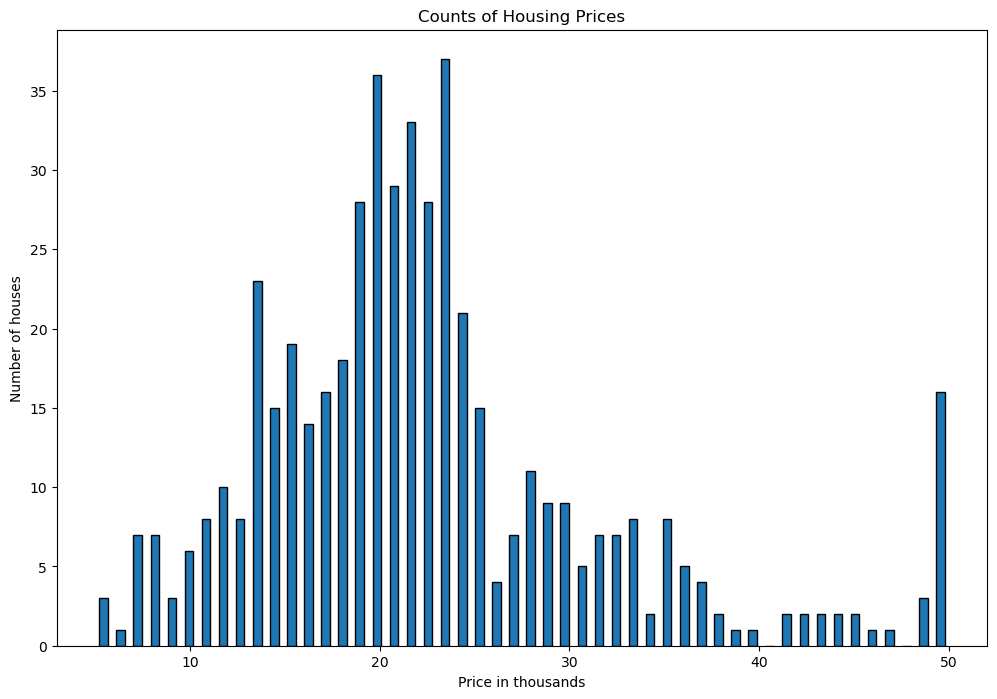

In [5]:
plt.figure(figsize=(12, 8))

plt.hist(df['MEDV'], bins=50, ec='black', rwidth=0.5)
plt.xlabel('Price in thousands')
plt.ylabel('Number of houses')
plt.title("Counts of Housing Prices")
plt.show()

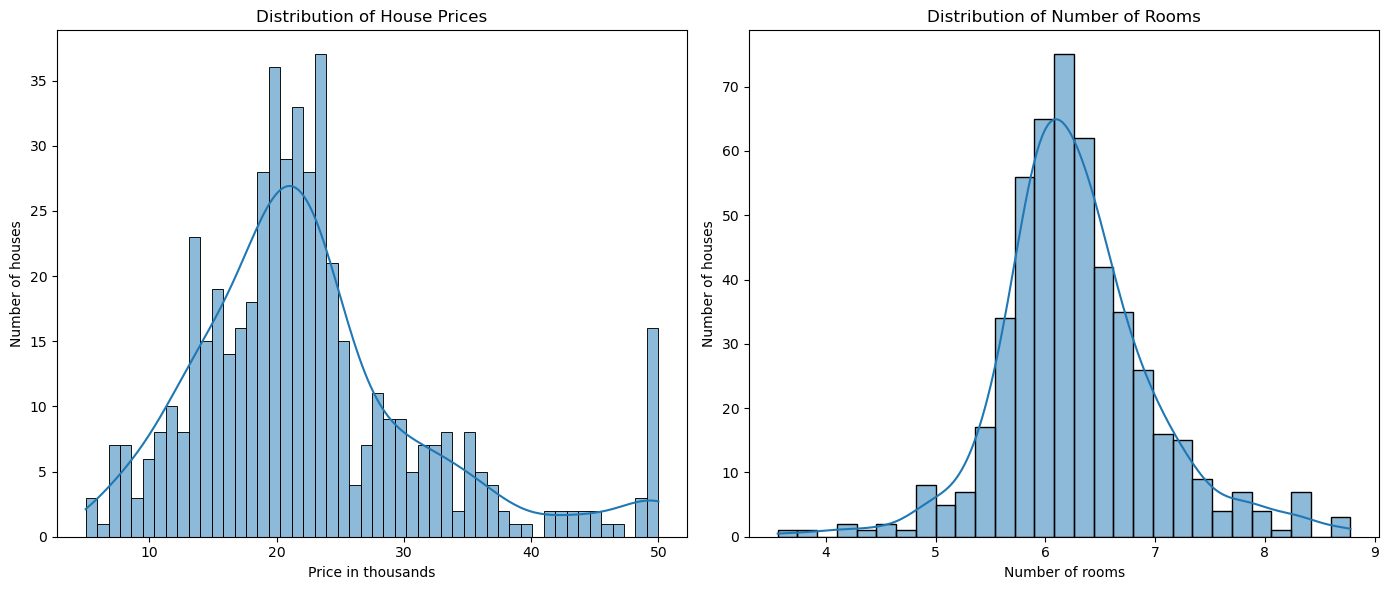

In [6]:
# Set up the figure with subplots for two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of 'MEDV' (house prices)
sns.histplot(df['MEDV'], bins=50, kde=True, ax=axes[0])
axes[0].set_xlabel('Price in thousands')
axes[0].set_ylabel('Number of houses')
axes[0].set_title('Distribution of House Prices')

# Plot the distribution of 'RM' (number of rooms)
sns.histplot(df['RM'], kde=True, ax=axes[1])
axes[1].set_xlabel('Number of rooms')
axes[1].set_ylabel('Number of houses')
axes[1].set_title('Distribution of Number of Rooms')

# Show the combined plots
plt.tight_layout()
plt.show()


# plt.figure(figsize=(12, 8))

# sns.displot(df['MEDV'], bins=50, kde=True)
# plt.xlabel('Price in thousands')
# plt.ylabel('Number of houses')

# plt.figure(figsize=(12, 8))

# sns.displot(df['RM'], kde=True)
# plt.xlabel('Number of rooms')
# plt.ylabel('Number of houses')

# plt.show()

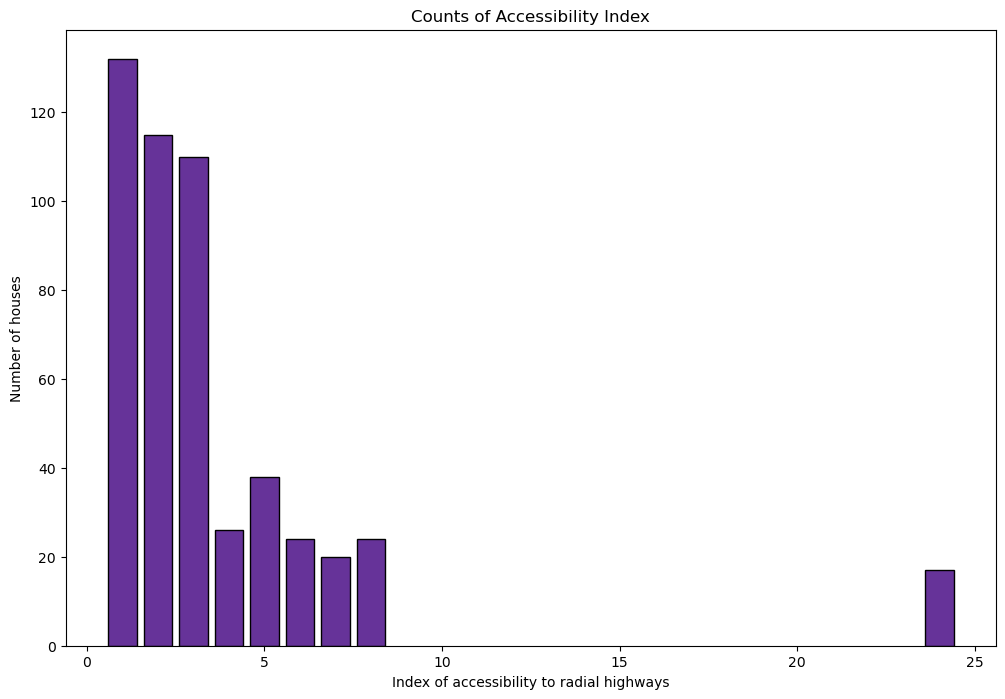

In [7]:
indices = df['RAD'].unique()
frequency = df['RAD'].value_counts()

plt.figure(figsize=(12, 8))

plt.bar(indices, frequency, ec='black', color="#663399")
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('Number of houses')
plt.title("Counts of Accessibility Index")
plt.show()

## Descriptive Statistics

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Inferential Statistics

### Correlation

#### $$ \rho _{XY} = Corr(XY) $$
#### $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
mask = np.zeros_like(df.corr())
upper_triangle = np.triu_indices_from(mask)
mask[upper_triangle] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

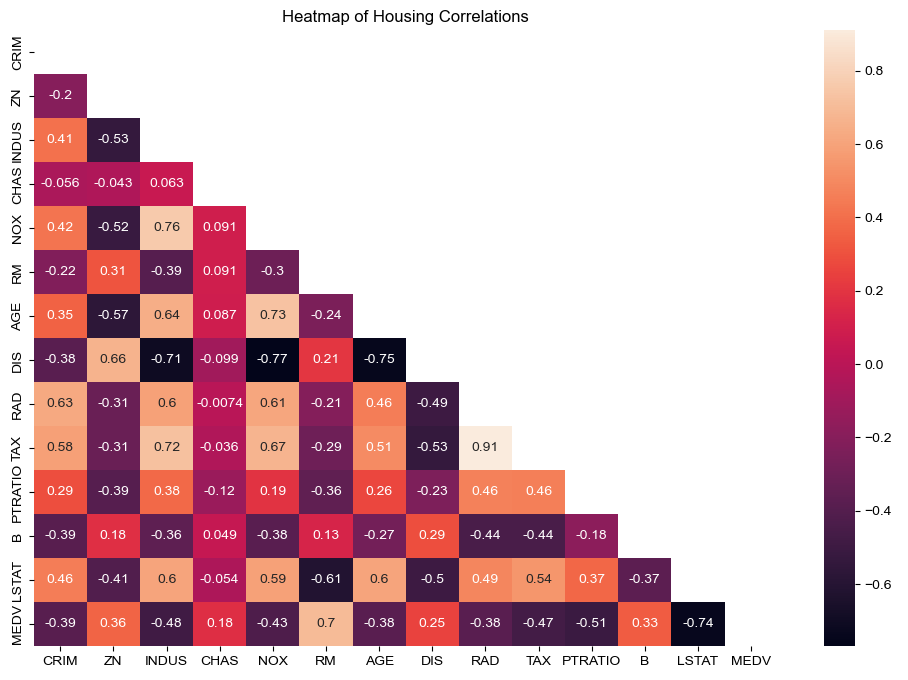

In [11]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), mask=mask, annot=True).set(title='Heatmap of Housing Correlations')
sns.set_style('white')
plt.show()

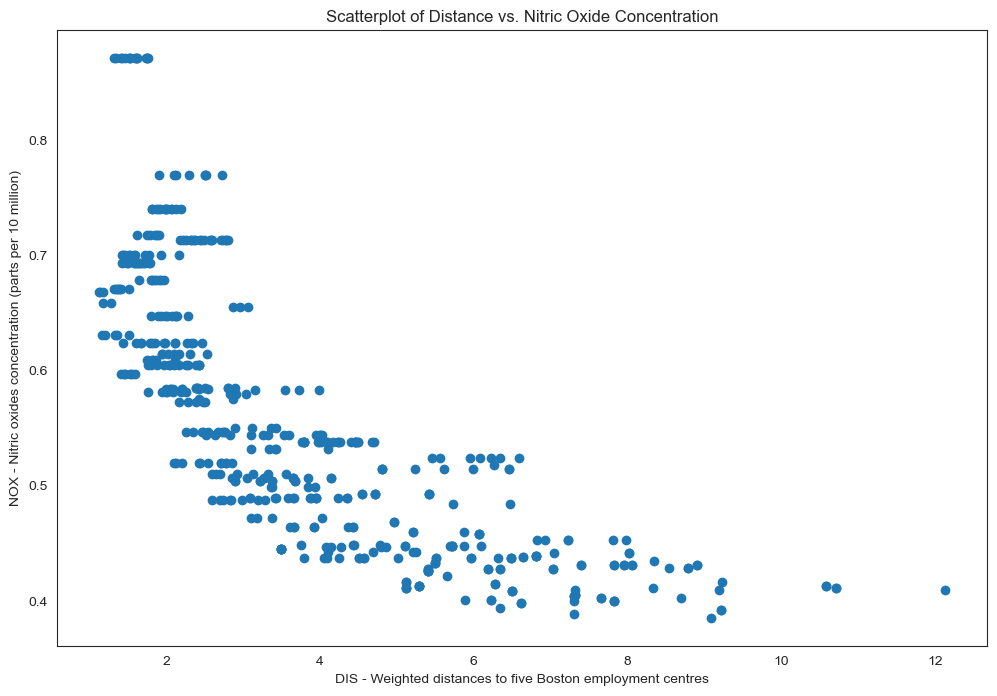

In [12]:
# Relationship between weighted distances to five Boston employment centres (DIS) and nitric oxides concentration (NOX)

plt.figure(figsize=(12, 8))

plt.scatter(x=df['DIS'], y=df['NOX'])
plt.xlabel('DIS - Weighted distances to five Boston employment centres')
plt.ylabel('NOX - Nitric oxides concentration (parts per 10 million)')
plt.title('Scatterplot of Distance vs. Nitric Oxide Concentration')
plt.show()

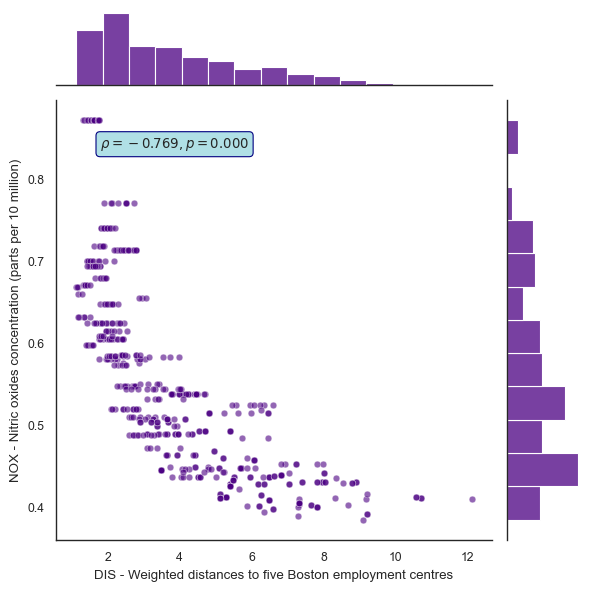

In [13]:
# Note: Seaborn does not have a scatterplot function.

sns.set_context('paper')
g = sns.jointplot(x=df['DIS'], y=df['NOX'], joint_kws={'alpha': 0.6}, color='indigo')

r, p = stats.pearsonr(x=df['DIS'], y=df['NOX'])
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.xlabel('DIS - Weighted distances to five Boston employment centres')
plt.ylabel('NOX - Nitric oxides concentration (parts per 10 million)')
plt.show()

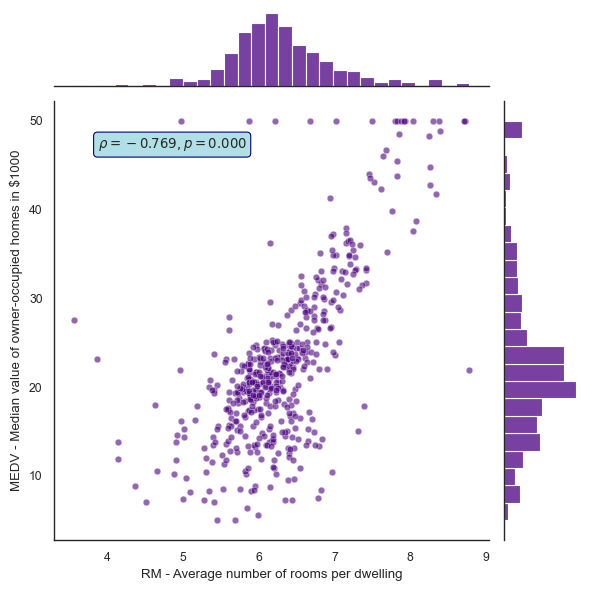

In [14]:
sns.set_context('paper')
g = sns.jointplot(x=df['RM'], y=df['MEDV'], joint_kws={'alpha': 0.6}, color='indigo')

g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.xlabel('RM - Average number of rooms per dwelling')
plt.ylabel('MEDV - Median value of owner-occupied homes in $1000')
plt.show()

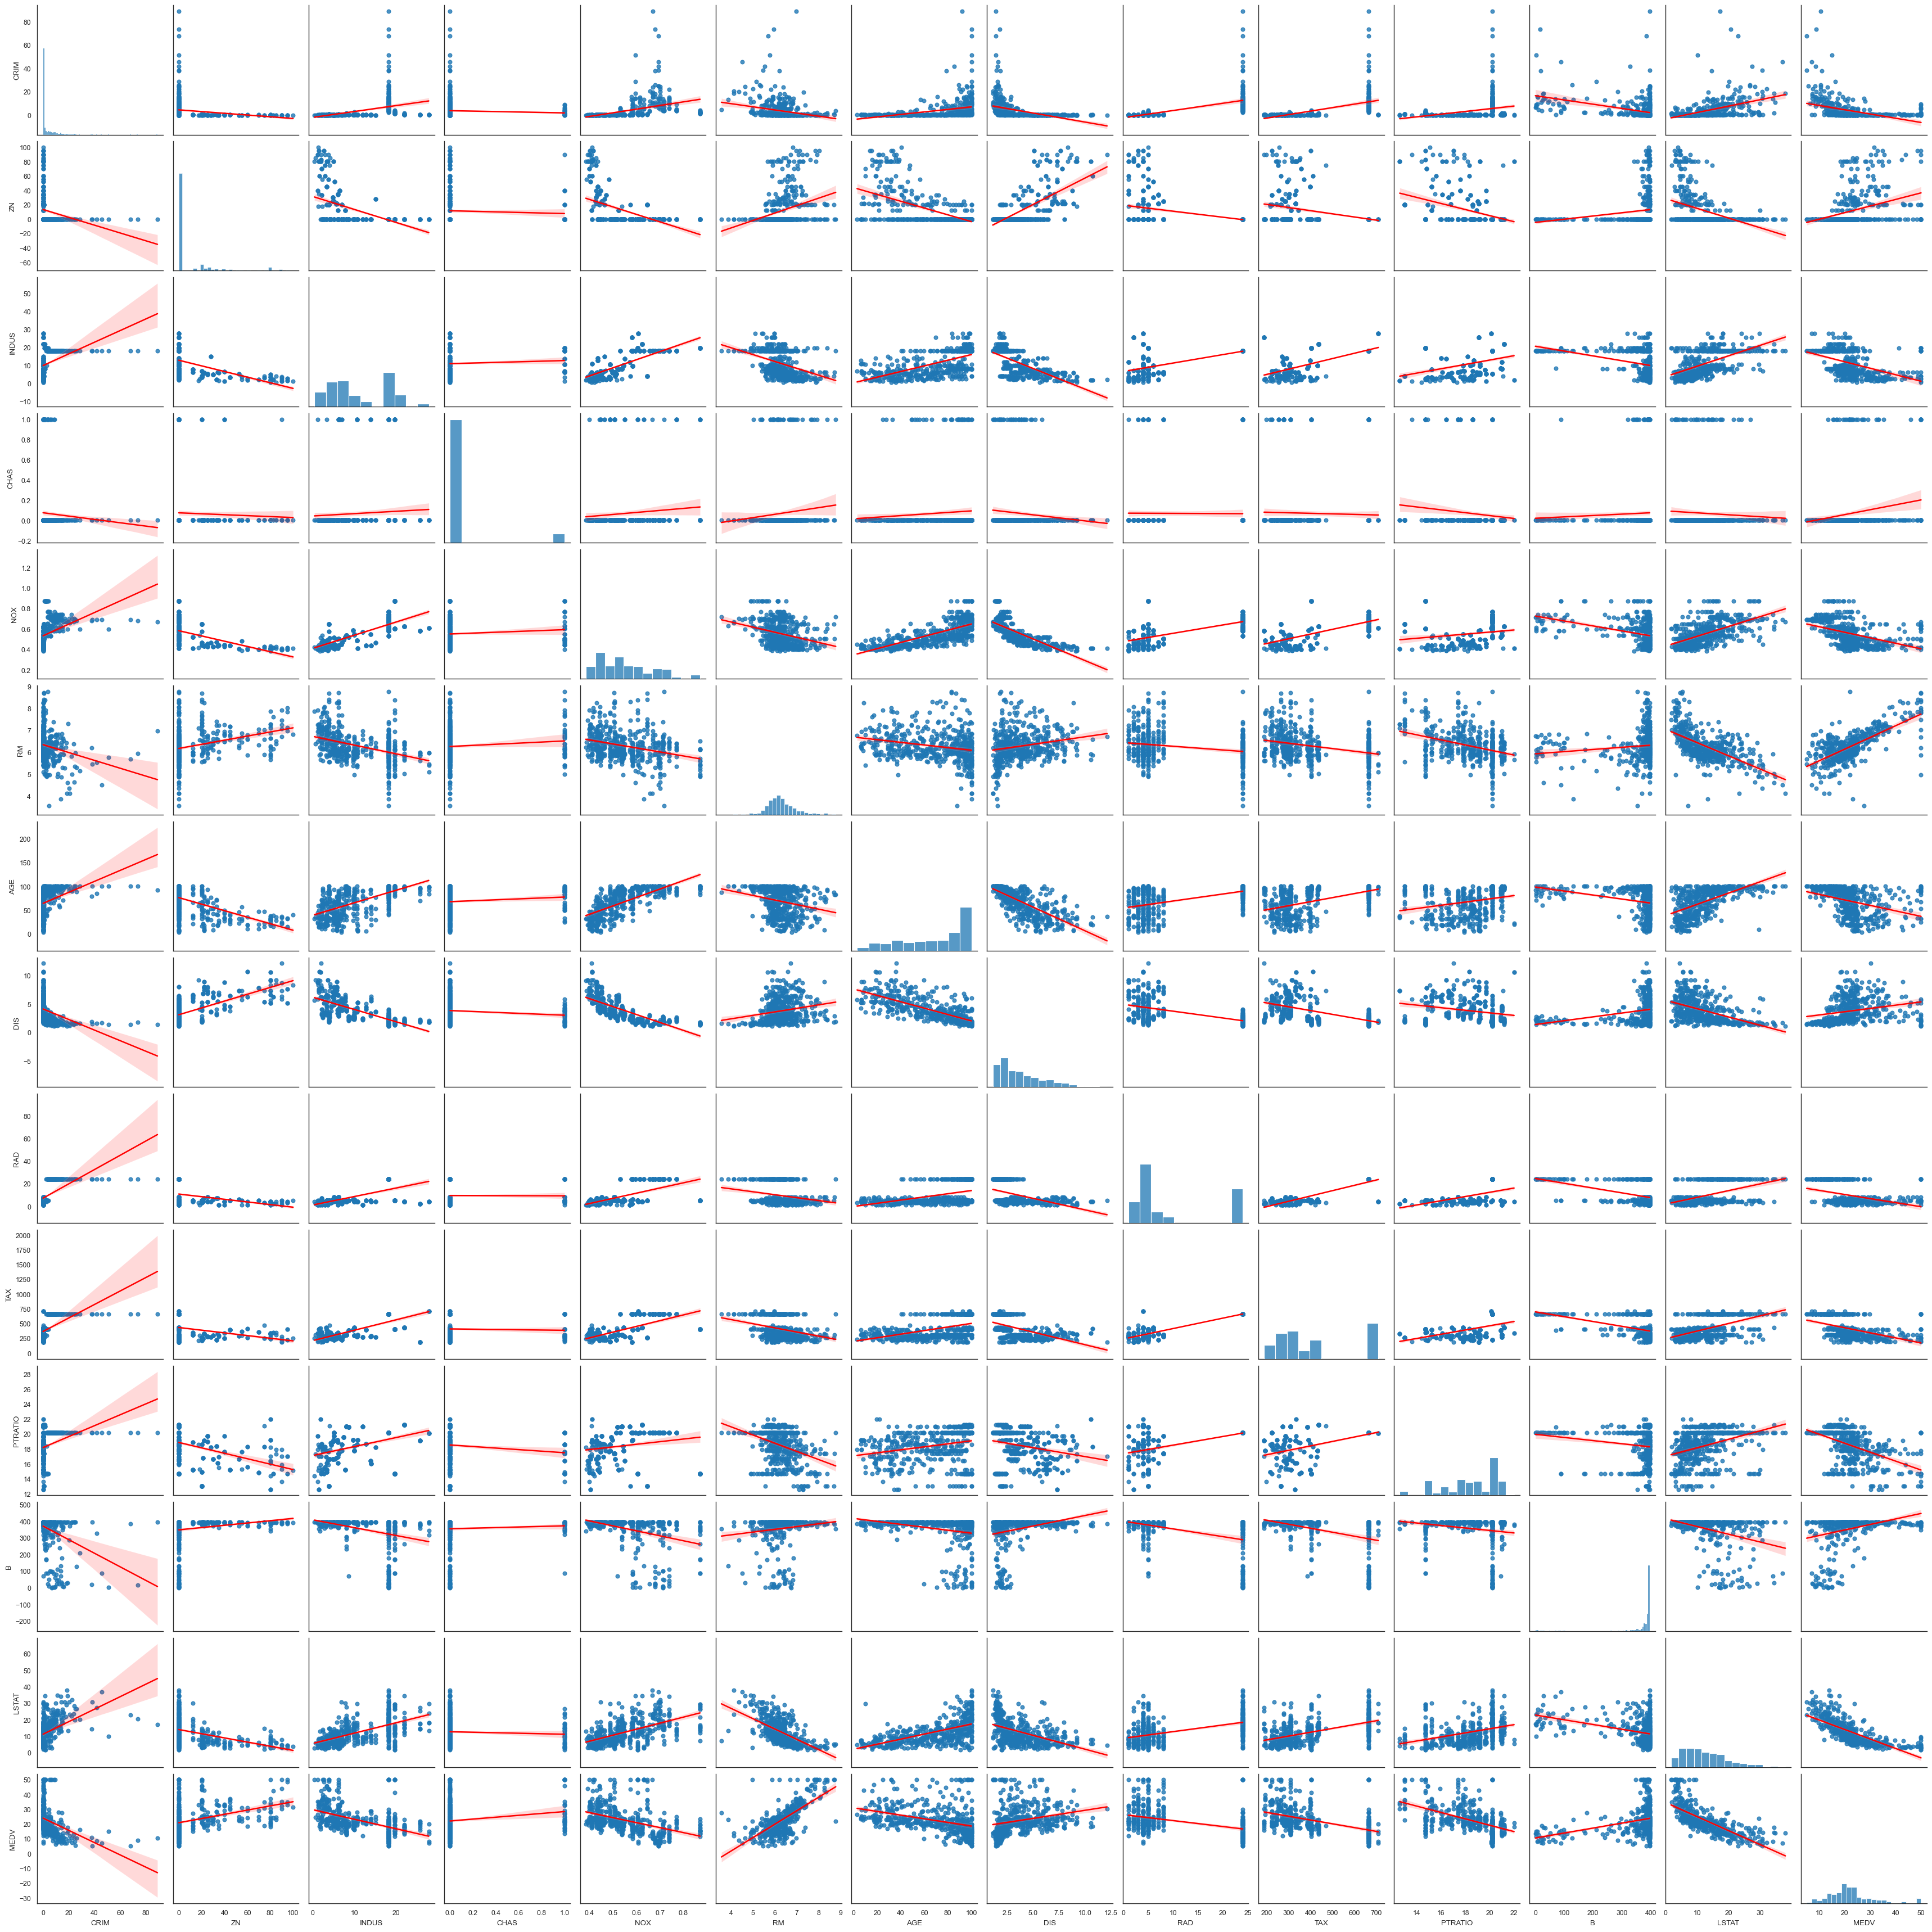

CPU times: user 52.7 s, sys: 721 ms, total: 53.4 s
Wall time: 56.8 s


In [15]:
%%time

sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color': 'red'}})
plt.show()

## 5) Train & build algorithm: Multiple Regression

### Training & testing sets

In [16]:
features = df.drop('MEDV', axis=1)
target = df['MEDV']
features.head()

# Features is the first array; target is second.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10) 

### Training Results

In [17]:
# Training data

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_train_predict1 = reg.predict(X_train)
print('R-squared: ', reg.score(X_train, y_train))
print(pd.DataFrame(reg.coef_, index=X_train.columns, columns=['Coefficients']))
print('Intercept: ', reg.intercept_)

R-squared:  0.750121534530608
         Coefficients
CRIM        -0.128181
ZN           0.063198
INDUS       -0.007576
CHAS         1.974515
NOX        -16.271989
RM           3.108456
AGE          0.016292
DIS         -1.483014
RAD          0.303988
TAX         -0.012082
PTRATIO     -0.820306
B            0.011419
LSTAT       -0.581626
Intercept:  36.53305138282434


In [18]:
print(y_train_predict1)
print(y_train)

[21.02958601 12.21844467 13.74785342 20.7351517  23.41262356 13.91896524
 28.93270221 15.93275264 15.22218031 22.25484624 26.38641515 29.18733455
 24.23140501 18.09942968 16.40587835 17.4186263  15.65122947 21.28912789
 34.31299511 29.88616576 20.90278802 13.75023401 16.19813658 29.16630099
 13.32233024 22.40099547 24.18543936 31.58822487 33.13516905  6.5126739
 35.3907224  24.21142064 17.27480742 24.18719251 28.20666734 34.62364626
  6.55528144  4.26819403 28.27658413 12.64000902 18.06198741 20.13023426
  6.15645739 14.150693   36.70774402 25.83392494 23.2145325  26.285604
 12.76642228 20.19773103 34.98291717 20.44191405 11.6176045  16.42015377
 24.42945242 10.40597467 14.67714741 25.7886378  11.26165698 12.11852939
 19.16397498 19.3141205  32.26664779 22.71058476 25.62230749  8.50310476
 21.00910913  6.73731392 27.8998401  20.8354717  23.94878492 25.67341126
 27.1039239  14.96205256 11.98747357 23.08232446 20.20617473 18.47488856
 22.79404142 20.68474847 22.67708381 19.28454019  8.03

### Regression: Actual values vs. predicted

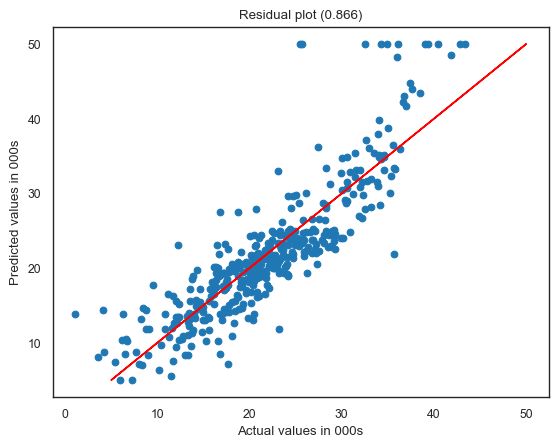

In [19]:
R2 = np.corrcoef(y_train_predict1, y_train)[0][1]
plt.scatter(y_train_predict1, y_train)
plt.plot(y_train, y_train, color='red')

plt.xlabel('Actual values in 000s')
plt.ylabel('Predicted values in 000s')
plt.title(f'Residual plot ({round(R2, 3)})')

plt.show()

### Assessing the model (e.g. coefficient p-Values)

In [20]:
X_summary1 = sm.add_constant(X_train)

model = sm.OLS(y_train, X_summary1, missing='drop')
model_result1 = model.fit()
print(model_result1.summary())

print(model_result1.resid)
print(model_result1.mse_resid)
print(mse(y_train, y_train_predict1))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     90.06
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.12e-108
Time:                        11:19:50   Log-Likelihood:                -1170.5
No. Observations:                 404   AIC:                             2369.
Df Residuals:                     390   BIC:                             2425.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5331      5.428      6.730      0.0

### A. Checking that there's a linear relationship

### B. Showing that the residuals are independent using the Durbin-Watson statistic


In [21]:
fitted_values = model_result1.fittedvalues
residuals = model_result1.resid
durbin_watson_stat = sm.stats.durbin_watson(residuals, axis=0)

print(durbin_watson_stat)

2.124548455902406


Because the Durbin-Watson test returns a value between 1.5 and 2.5, autocorrelation is likely not a cause for concern.

Therefore, the residuals are independent.

### C. Showing that the residuals display homoscedasticity (i.e. constant variance) using the Breusch-Pagan Test

In [22]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.stats.api.het_breuschpagan(residuals, model_result1.model.exog)
pd.Series(test, index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

Lagrange multiplier statistic    6.254941e+01
p-value                          1.830725e-08
f-value                          5.495618e+00
f p-value                        3.498179e-09
dtype: float64

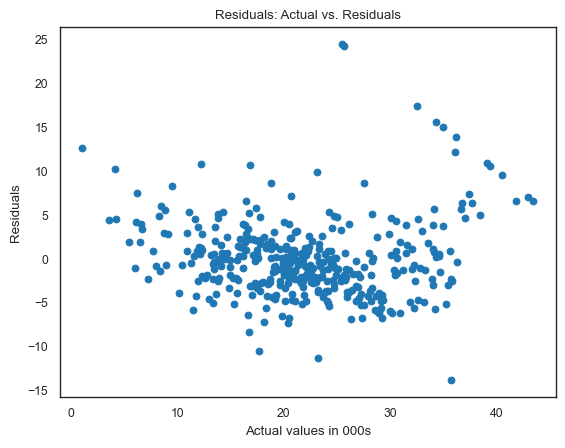

In [23]:
plt.scatter(y_train_predict1, model_result1.resid)

plt.xlabel('Actual values in 000s')
plt.ylabel('Residuals')
plt.title(f'Residuals: Actual vs. Residuals')

plt.show()

Since the p-value is less than our significance less (0.05), our regression is homoscedastic.

Source: https://www.statology.org/breusch-pagan-test/

### D. Showing that the residuals display normality

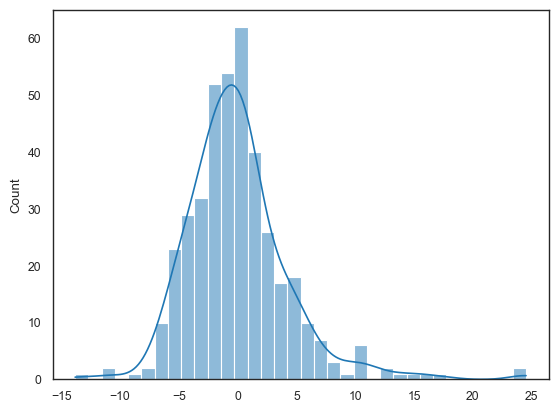

In [24]:
# sm.qqplot(residuals, line='s')

sns.histplot(model_result1.resid, kde=True)
plt.show()

### E. Checking for multicollinearity using the variance influence factor (VIF)

In [25]:
# print(X_train.columns)

VIF_values = pd.Series([round(VIF(X_summary1, i), 2) for i in range(0, len(X_train.columns))], index=X_train.columns)
print(VIF_values)

CRIM       597.55
ZN           1.71
INDUS        2.33
CHAS         3.94
NOX          1.08
RM           4.41
AGE          1.84
DIS          3.33
RAD          4.22
TAX          7.31
PTRATIO      8.51
B            1.84
LSTAT        1.34
dtype: float64


The cutoff for multicollinearity is 10, and none of the features meet that cutoff.

Therefore, we can say that there is no multicollinearity.

## Transforming Regression with Log Prices

In [26]:
log_features = df.drop(['MEDV', 'INDUS', 'AGE'], axis=1) # INDUS, AGE have been dropped for not being statistically significant.
log_target = np.log(df['MEDV'])

# Features is the first array; target is second.
X_train, X_test, y_train, y_test = train_test_split(log_features, log_target, test_size=0.2, random_state=10) 

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_train_predict2 = reg.predict(X_train)
print('R-squared:', reg.score(X_train, y_train))
print(pd.DataFrame(reg.coef_, index=X_test.columns, columns=['Coefficients']))
print('Intercept:', reg.intercept_)

R-squared: 0.7918657661852815
         Coefficients
CRIM        -0.010702
ZN           0.001461
CHAS         0.086449
NOX         -0.616448
RM           0.076133
DIS         -0.052692
RAD          0.013743
TAX         -0.000590
PTRATIO     -0.033481
B            0.000518
LSTAT       -0.030271
Intercept: 4.03592171504836


### Regression: Actual values vs. predicted

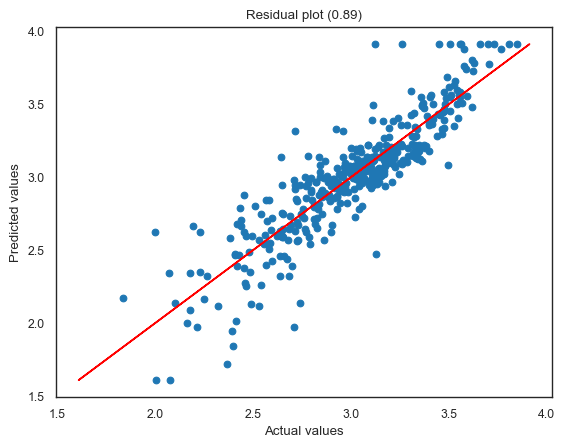

In [27]:
R2 = np.corrcoef(y_train_predict2, y_train)[0][1]
plt.scatter(y_train_predict2, y_train)
plt.plot(y_train, y_train, color='red')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title(f'Residual plot ({round(R2, 3)})')

plt.show()

### Assessing the model (e.g. coefficient p-Values)

In [28]:
X_summary2 = sm.add_constant(X_train)

model = sm.OLS(y_train, X_summary2, missing='drop')
model_result2 = model.fit()
print(model_result2.summary())

print(model_result2.resid)
print(model_result2.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          3.68e-126
Time:                        11:19:51   Log-Likelihood:                 110.76
No. Observations:                 404   AIC:                            -197.5
Df Residuals:                     392   BIC:                            -149.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0359      0.226     17.819      0.0

### A. Checking that there's a linear relationship

### B. Showing that the residuals are independent using the Durbin-Watson statistic


In [29]:
fitted_values = model_result2.fittedvalues
residuals = model_result2.resid
durbin_watson_stat = sm.stats.durbin_watson(residuals, axis=0)

print(durbin_watson_stat)

2.0716128816841124


Because the Durbin-Watson test returns a value between 1.5 and 2.5, autocorrelation is likely not a cause for concern.

Therefore, the residuals are independent.

### C. Showing that the residuals display homoscedasticity (i.e. constant variance) using the Breusch-Pagan Test

In [30]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.stats.api.het_breuschpagan(residuals, model_result2.model.exog)
pd.Series(test, index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

Lagrange multiplier statistic    5.792609e+01
p-value                          2.245454e-08
f-value                          5.964839e+00
f p-value                        5.194101e-09
dtype: float64

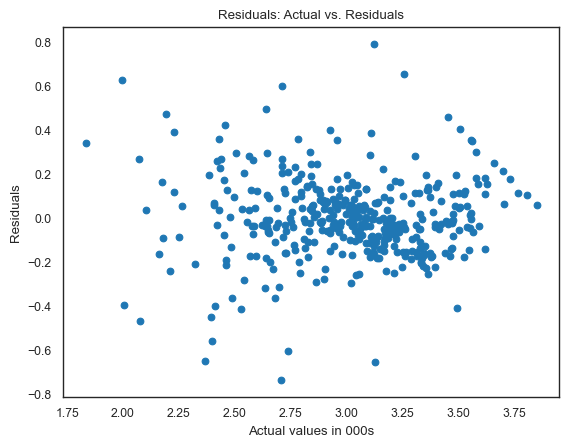

In [31]:
plt.scatter(y_train_predict2, model_result2.resid)

plt.xlabel('Actual values in 000s')
plt.ylabel('Residuals')
plt.title(f'Residuals: Actual vs. Residuals')

plt.show()

Since the p-value is less than our significance less (0.05), our regression is homoscedastic.

Source: https://www.statology.org/breusch-pagan-test/

### D. Showing that the residuals display normality

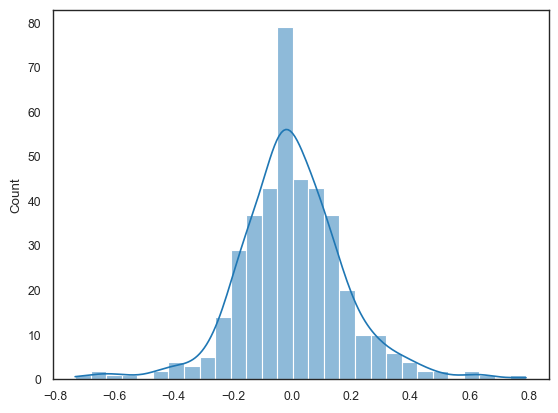

In [32]:
# sm.qqplot(residuals, line='s')

sns.histplot(model_result2.resid, kde=True)
plt.show()

### E. Checking for multicollinearity using the variance influence factor (VIF)

In [33]:
# print(X_train.columns)

VIF_values = pd.Series([round(VIF(X_summary2, i), 2) for i in range(0, len(X_train.columns))], index=X_train.columns)
print(VIF_values)

CRIM       594.28
ZN           1.71
CHAS         2.29
NOX          1.07
RM           3.83
DIS          1.75
RAD          3.59
TAX          6.79
PTRATIO      7.11
B            1.79
LSTAT        1.33
dtype: float64


The cutoff for multicollinearity is 10, and none of the features meet that cutoff.

Therefore, we can say that there is no multicollinearity.

### Test Results

In [34]:
# Test data

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_test_predict = reg.predict(X_test)  # Predict on test data
print('R-squared:', reg.score(X_test, y_test))
print(pd.DataFrame(reg.coef_, index=X_test.columns, columns=['Coefficients']))
print('Intercept:', reg.intercept_)

R-squared: 0.7490934185196063
         Coefficients
CRIM        -0.010702
ZN           0.001461
CHAS         0.086449
NOX         -0.616448
RM           0.076133
DIS         -0.052692
RAD          0.013743
TAX         -0.000590
PTRATIO     -0.033481
B            0.000518
LSTAT       -0.030271
Intercept: 4.03592171504836


### How well does the training set fit the test set? Do new data points (i.e. test set) have similar coefficients, MSE, R-Squared, etc. as the training set?

In [35]:
# R-squared scores
r2_train = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)

# We need to make predictions first
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Squared Error (MSE)
mse_train = mse(y_train, y_train_predict1)
mse_test = mse(y_test, y_test_predict)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print metrics side by side
print(f"{'Metric':<10} {'Training':>12} {'Testing':>12}")
print('-' * 35)
print(f"{'R²':.<10} {r2_train:>12.4f} {r2_test:>12.4f}")
print(f"{'MSE':.<10} {mse_train:>12.4f} {mse_test:>12.4f}")
print(f"{'RMSE':.<10} {rmse_train:>12.4f} {rmse_test:>12.4f}")

Metric         Training      Testing
-----------------------------------
R²........       0.7919       0.7491
MSE.......     407.3670       0.0419
RMSE......      20.1833       0.2046


### Regression: Actual values vs. predicted

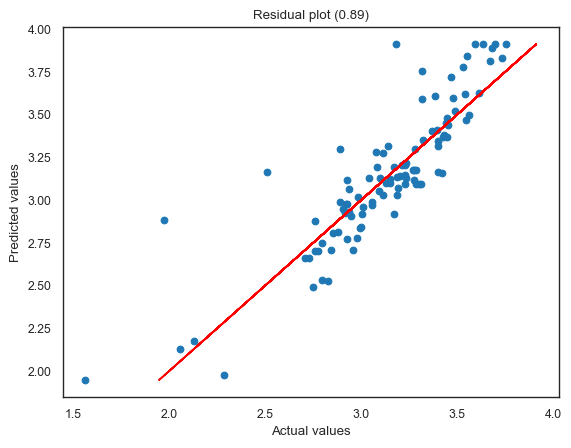

In [36]:
R3 = np.corrcoef(y_test_predict, y_test)[0][1]
plt.scatter(y_test_predict, y_test)
plt.plot(y_test, y_test, color='red')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title(f'Residual plot ({round(R2, 3)})')

plt.show()

In [37]:
X_summary3 = sm.add_constant(X_test)

model = sm.OLS(y_test, X_summary3, missing='drop')
model_result3 = model.fit()
print(model_result3.summary())

print(model_result3.resid)
print('Mean absolute error:', model_result3.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     33.08
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           6.22e-27
Time:                        11:19:53   Log-Likelihood:                 29.106
No. Observations:                 102   AIC:                            -34.21
Df Residuals:                      90   BIC:                            -2.712
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3113      0.473      9.122      0.0

### A. Checking that there's a linear relationship

### B. Showing that the residuals are independent using the Durbin-Watson statistic


In [38]:
fitted_values = model_result3.fittedvalues
residuals = model_result3.resid
durbin_watson_stat = sm.stats.durbin_watson(residuals, axis=0)

print(durbin_watson_stat)

1.9925897546011744


Because the Durbin-Watson test returns a value between 1.5 and 2.5, autocorrelation is likely not a cause for concern.

Therefore, the residuals are independent.

### C. Showing that the residuals display homoscedasticity (i.e. constant variance) using the Breusch-Pagan Test

In [39]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.stats.api.het_breuschpagan(residuals, model_result3.model.exog)
pd.Series(test, index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

Lagrange multiplier statistic    23.792137
p-value                           0.013639
f-value                           2.489046
f p-value                         0.008936
dtype: float64

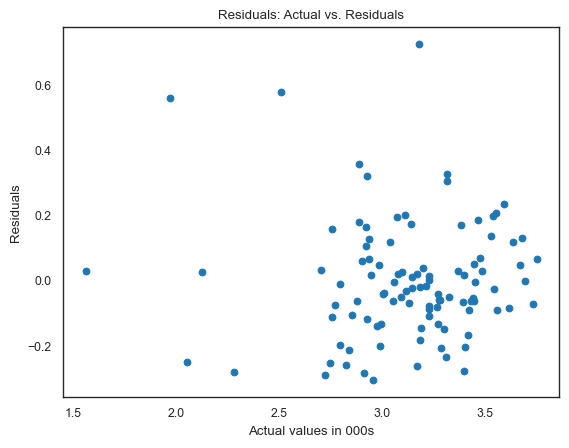

In [40]:
plt.scatter(y_test_predict, model_result3.resid)

plt.xlabel('Actual values in 000s')
plt.ylabel('Residuals')
plt.title(f'Residuals: Actual vs. Residuals')

plt.show()

Since the p-value is less than our significance less (0.05), our regression is homoscedastic.

Source: https://www.statology.org/breusch-pagan-test/

### D. Showing that the residuals display normality

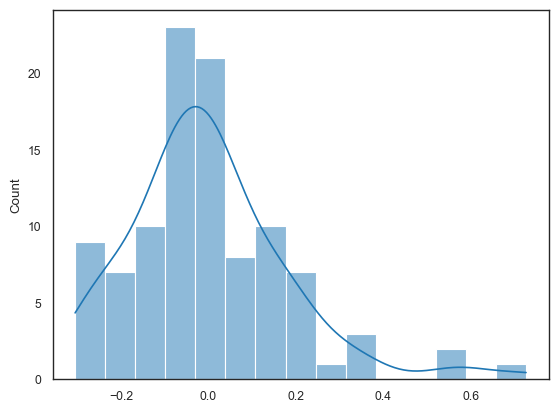

In [41]:
# sm.qqplot(residuals, line='s')

sns.histplot(model_result3.resid, kde=True)
plt.show()

### E. Checking for multicollinearity using the variance influence factor (VIF)

In [42]:
# print(X_train.columns)

VIF_values = pd.Series([round(VIF(X_summary3, i), 2) for i in range(0, len(X_test.columns))], index=X_test.columns)
print(VIF_values)

CRIM       607.66
ZN           2.97
CHAS         2.23
NOX          1.05
RM           3.97
DIS          2.31
RAD          2.99
TAX          7.50
PTRATIO      8.29
B            1.68
LSTAT        1.63
dtype: float64


The cutoff for multicollinearity is 10, and none of the features meet that cutoff.

Therefore, we can say that there is no multicollinearity.

## 6) Evaluation: How well does the model do?

In [43]:
confidence_level = 0.95
alpha = 1 - confidence_level
df = 390  # degrees of freedom
t_value = stats.t.ppf(1 - alpha/2, df)

rmse = math.sqrt(0.03487337082354599)

standard_error_predict = rmse * math.sqrt(1 * (1/390))

margin_error = t_value * standard_error_predict

prediction_error_plus = 35000 + margin_error
prediction_error_minus = 35000 - margin_error

print(f"The prediction interval is {prediction_error_minus} <= 35000 <= {prediction_error_plus}")


The prediction interval is 34999.98140857814 <= 35000 <= 35000.01859142186
